In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd #for checking datasets
from scipy.stats import mode
import squarify
import numpy.lib.recfunctions as rcf
import statsmodels.api as sm

# Importing 3 datasets
Your code should produce at least 4 of the following chart types:

At least one bar chart

At least one line chart

At least one pie chart

At least one histogram

At least one scatterplot

At least one boxplot 

Any other type of chart that can be produced by matplotlib
lotlib
tplotlib


In [81]:
#Dataset 1 - 1_HDBPropertyInformation

# Define the structured dtype
dtype_dataset1 = [
    ("blk_no", "U10"),  # Assuming block number is a string of up to 10 characters
    ("street", "U50"),  # Street name, string up to 50 characters
    ("max_floor_lvl", "i4"),  # Maximum floor level, integer
    ("year_completed", "i4"),  # Year completed, integer
    ("residential", "U1"),   # Residential, initially as string ("Y"/"N")
    ("commercial", "U1"),   # Commercial, initially as string ("Y"/"N")
    ("market_hawker", "U1"),  # Market_hawker, initially as string ("Y"/"N")
    ("miscellaneous", "U1"),  # Miscellaneous, initially as string ("Y"/"N")
    ("multistorey_carpark", "U1"),  # Multi-storey carpark, initially as string ("Y"/"N")
    ("precinct_pavilion", "U1"),  # Precinct pavilion, initially as string ("Y"/"N")
    ("bldg_contract_town", "U30"),  # Town name, string up to 30 characters
    ("total_dwelling_units", "i4"),  # Total dwelling units, integer
    ("1room_sold", "i4"),  # 1-room flats sold, integer
    ("2room_sold", "i4"),  # 2-room flats sold, integer
    ("3room_sold", "i4"),  # 3-room flats sold, integer
    ("4room_sold", "i4"),  # 4-room flats sold, integer
    ("5room_sold", "i4"),  # 5-room flats sold, integer
    ("exec_sold", "i4"),  # Executive flats sold, integer
    ("multigen_sold", "i4"),  # Multi-generational flats sold, integer
    ("studio_apartment_sold", "i4"),  # Studio apartments sold, integer
    ("1room_rental", "i4"),  # 1-room flats rented, integer
    ("2room_rental", "i4"),  # 2-room flats rented, integer
    ("3room_rental", "i4"),  # 3-room flats rented, integer
    ("other_room_rental", "i4")  # Other rooms rented, integer
]


In [82]:
dtype_dataset2 = [
    ("rent_approval_date", "U10"),   # Date in string format, assuming 'YYYY-MM-DD'
    ("town", "U50"),                # Town name as a string (max length 50)
    ("block", "U10"),               # Block number as a string (max length 10)
    ("street_name", "U100"),        # Street name as a string (max length 100)
    ("flat_type", "U20"),           # Flat type as a string (e.g., "3-room")
    ("monthly_rent", "f8")          # Monthly rent as a float
]

In [83]:
dtype_dataset3 = [
    ("month", "U10"),                # Month in string format (e.g., "2024-01")
    ("town", "U50"),                 # Town name as a string (max length 50)
    ("flat_type", "U20"),            # Flat type as a string (e.g., "3-room")
    ("block", "U10"),                # Block number as a string (e.g., "123A")
    ("street_name", "U100"),         # Street name as a string (max length 100)
    ("storey_range", "U20"),         # Storey range as a string (e.g., "01 to 05")
    ("floor_area_sqm", "f8"),        # Floor area in square meters as a float
    ("flat_model", "U50"),           # Flat model as a string (e.g., "Model A")
    ("lease_commence_date", "i4"),   # Lease commencement year as an integer
    ("remaining_lease", "U20"),      # Remaining lease as a string (e.g., "92 years")
    ("resale_price", "f8")           # Resale price as a float
]

## Master datasets

In [85]:
dataset_1_master = np.loadtxt("C:/Users/Admin/workfolder/CA/Data/1_HDBPropertyInformation.csv", skiprows=1, delimiter=",", dtype=dtype_dataset1)

In [86]:
dataset_2_master = np.loadtxt("C:/Users/Admin/workfolder/CA/Data/2_RentingOutofFlats2024CSV.csv", skiprows=1, delimiter=",", dtype=dtype_dataset2)

In [87]:

dataset_3_master = np.loadtxt(
    "C:/Users/Admin/workfolder/CA/Data/3_ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv",
    skiprows=1,
    delimiter=",",
    dtype=dtype_dataset3
)

## check import issues/display issues

In [89]:
print(dataset_1_master[:5])

[('1', 'BEACH RD', 16, 1970, 'Y', 'Y', 'N', 'N', 'N', 'N', 'KWN', 142, 0, 1, 138,  1,  2, 0, 0, 0, 0, 0, 0, 0)
 ('1', 'BEDOK STH AVE 1', 14, 1975, 'Y', 'N', 'N', 'Y', 'N', 'N', 'BD', 206, 0, 0, 204,  0,  2, 0, 0, 0, 0, 0, 0, 0)
 ('1', 'CANTONMENT RD',  2, 2010, 'N', 'Y', 'N', 'N', 'N', 'N', 'CT',   0, 0, 0,   0,  0,  0, 0, 0, 0, 0, 0, 0, 0)
 ('1', 'CHAI CHEE RD', 15, 1982, 'Y', 'N', 'N', 'N', 'N', 'N', 'BD', 102, 0, 0,   0, 10, 92, 0, 0, 0, 0, 0, 0, 0)
 ('1', 'CHANGI VILLAGE RD',  4, 1975, 'Y', 'Y', 'N', 'N', 'N', 'N', 'PRC',  55, 0, 0,  54,  0,  1, 0, 0, 0, 0, 0, 0, 0)]


In [90]:
print(dataset_2_master[:5])

[('2021-01', 'ANG MO KIO', '105', 'ANG MO KIO AVE 4', '4-ROOM', 2000.)
 ('2021-01', 'ANG MO KIO', '107', 'ANG MO KIO AVE 4', '3-ROOM', 1750.)
 ('2021-01', 'ANG MO KIO', '108', 'ANG MO KIO AVE 4', '3-ROOM', 1750.)
 ('2021-01', 'ANG MO KIO', '111', 'ANG MO KIO AVE 4', '5-ROOM', 2230.)
 ('2021-01', 'ANG MO KIO', '111', 'ANG MO KIO AVE 4', '5-ROOM', 2450.)]


In [91]:
print(dataset_3_master[:5])

[('2017-01', 'ANG MO KIO', '2 ROOM', '406', 'ANG MO KIO AVE 10', '10 TO 12', 44., 'Improved', 1979, '61 years 04 months', 232000.)
 ('2017-01', 'ANG MO KIO', '3 ROOM', '108', 'ANG MO KIO AVE 4', '01 TO 03', 67., 'New Generation', 1978, '60 years 07 months', 250000.)
 ('2017-01', 'ANG MO KIO', '3 ROOM', '602', 'ANG MO KIO AVE 5', '01 TO 03', 67., 'New Generation', 1980, '62 years 05 months', 262000.)
 ('2017-01', 'ANG MO KIO', '3 ROOM', '465', 'ANG MO KIO AVE 10', '04 TO 06', 68., 'New Generation', 1980, '62 years 01 month', 265000.)
 ('2017-01', 'ANG MO KIO', '3 ROOM', '601', 'ANG MO KIO AVE 5', '01 TO 03', 67., 'New Generation', 1980, '62 years 05 months', 265000.)]


## What is the total number of residential buildings completed per year since 1937? (dataset 1)


In [ ]:
# Filter the dataset for residential buildings
residential_data = dataset_1_master[dataset_1_master['residential'] == 'Y']

# Extract the `year_completed` column as a NumPy array
year_completed = residential_data['year_completed']
total_rows_data_1 = len(dataset_1_master)

# Calculate summary statistics using NumPy
num_rows = len(year_completed)
unique_years = np.unique(year_completed).size
first_year = np.min(year_completed)
last_year = np.max(year_completed)
mean_year = np.mean(year_completed)
std_dev = np.std(year_completed)

# Prepare the summary statistics for display
summary = {
    "Total Rows": total_rows_data_1,
    "Total Rows (Residential Only)": num_rows,
    "Unique Years (year_completed)": unique_years,
    "First Year": first_year,
    "Last Year": last_year,
    "Mean Year": round(mean_year, 2),
    "Standard Deviation": round(std_dev, 2)
}

# Display the summary
print("Summary of Residential Buildings:")
for key, value in summary.items():
    print(f"{key}: {value}")

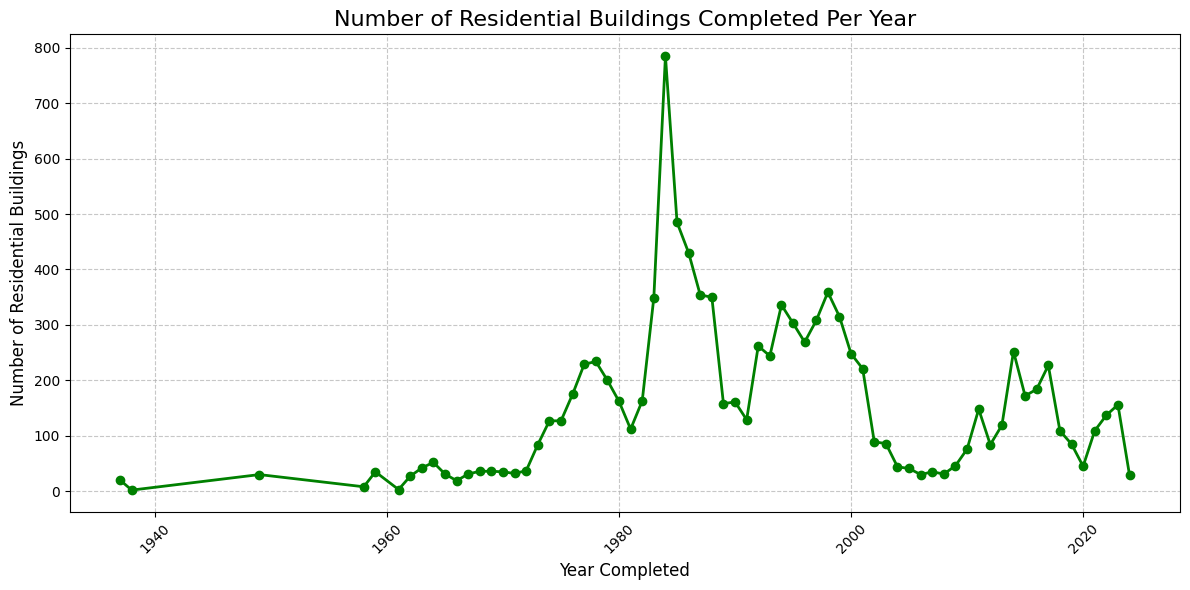

In [98]:
# Extract the relevant columns
year_completed = dataset_1_master['year_completed']
residential = dataset_1_master['residential']

# Filter for residential buildings where residential column is 'Y'
residential_filter = residential == 'Y'

# Apply the filter to get the years when residential buildings were completed
residential_years = year_completed[residential_filter]

# Use NumPy to calculate the number of residential buildings completed per year
unique_years, building_counts = np.unique(residential_years, return_counts=True)

# Plot the data using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(unique_years, building_counts, marker='o', color='g', linestyle='-', linewidth=2)
plt.title('Number of Residential Buildings Completed Per Year', fontsize=16)
plt.xlabel('Year Completed', fontsize=12)
plt.ylabel('Number of Residential Buildings', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## Based on the scatterplot and general knowledge of Singapore's public housing landscape:

The graph shows the number of residential buildings completed per year in Singapore, based on filtered data where only residential buildings were considered. The x-axis represents the year of completion, while the y-axis represents the number of residential buildings completed.

Key Observations:
1940s to 1960s:

The number of residential buildings completed was low but steady, reflecting Singapore's pre-independence period when public housing was not a priority.

1970s to 1980s (Peak):

There is a sharp rise in the number of residential buildings completed, peaking in the late 1970s to early 1980s.
This period corresponds to the Housing and Development Board's (HDB) aggressive public housing programs to address a housing crisis.

1990s to Early 2000s:

A more stable but reduced number of residential completions compared to the peak.
This reflects the shift to upgrading existing flats and improving infrastructure rather than building large-scale new flats.

Post-2000s:

Another slight increase and fluctuations in completions, likely reflecting urban redevelopment and expansion of housing options.

## checking the total distribution of houses based on different towns in the dataset_2

In [102]:
#Count Total Rows in the Dataset:
total_rows_data_2 = len(dataset_2_master)

In [104]:
print(f"The total number of rows found in the dataset 2 is {total_rows_data_2}")

The total number of rows found in the dataset 2 is 140008


In [106]:
# Convert the relevant columns to NumPy arrays
locations = dataset_2_master['town']
flat_types = dataset_2_master['flat_type']

# Calculate summary statistics using NumPy
num_rows = locations.size
unique_locations = np.unique(locations).size
unique_flat_types = np.unique(flat_types).size

# Count occurrences of each location and flat type
location_counts = {loc: np.sum(locations == loc) for loc in np.unique(locations)}
flat_type_counts = {ft: np.sum(flat_types == ft) for ft in np.unique(flat_types)}

# Prepare and display the summary
print("***Summary of Renting Out Flats Dataset***")
print(f"There are {num_rows} rows in this dataset.")
print(f"There are {unique_locations} unique locations in the 'location' column.")
print(f"There are {unique_flat_types} unique flat types in the 'flat_type' column.")

flat_type, counts = np.unique(dataset_2_master['flat_type'], return_counts=True)
print("Unique Values:", flat_type)
print("Counts:", counts)

for rooms, count in zip(flat_type, counts):
    print(f"{rooms}: {count}")


***Summary of Renting Out Flats Dataset***
There are 140008 rows in this dataset.
There are 27 unique locations in the 'location' column.
There are 6 unique flat types in the 'flat_type' column.
Unique Values: ['1-ROOM' '2-ROOM' '3-ROOM' '4-ROOM' '5-ROOM' 'EXECUTIVE']
Counts: [   42  2811 45670 50407 33278  7800]
1-ROOM: 42
2-ROOM: 2811
3-ROOM: 45670
4-ROOM: 50407
5-ROOM: 33278
EXECUTIVE: 7800


In [107]:
towns, counts = np.unique(dataset_2_master['town'], return_counts=True)
print("Unique Values:", towns)
print("Counts:", counts)

Unique Values: ['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG' 'HOUGANG'
 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE' 'PASIR RIS'
 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON' 'TAMPINES'
 'TENGAH' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']
Counts: [7720 8325 3098 5247 7660 3485  420 2102 4939 5110 4219 6620 3761 9758
 5303 1526 3819 6184 5803 3284 9067 3143 9327    1 5618 7060 7409]


In [110]:
for town, count in zip(towns, counts):
    print(f"{town}: {count}")

ANG MO KIO: 7720
BEDOK: 8325
BISHAN: 3098
BUKIT BATOK: 5247
BUKIT MERAH: 7660
BUKIT PANJANG: 3485
BUKIT TIMAH: 420
CENTRAL: 2102
CHOA CHU KANG: 4939
CLEMENTI: 5110
GEYLANG: 4219
HOUGANG: 6620
JURONG EAST: 3761
JURONG WEST: 9758
KALLANG/WHAMPOA: 5303
MARINE PARADE: 1526
PASIR RIS: 3819
PUNGGOL: 6184
QUEENSTOWN: 5803
SEMBAWANG: 3284
SENGKANG: 9067
SERANGOON: 3143
TAMPINES: 9327
TENGAH: 1
TOA PAYOH: 5618
WOODLANDS: 7060
YISHUN: 7409


In [112]:
data_dict = {
    "ANG MO KIO": 7720,
    "BEDOK": 8325,
    "BISHAN": 3098,
    "BUKIT BATOK": 5247,
    "BUKIT MERAH": 7660,
    "BUKIT PANJANG": 3485,
    "BUKIT TIMAH": 420,
    "CENTRAL": 2102,
    "CHOA CHU KANG": 4939,
    "CLEMENTI": 5110,
    "GEYLANG": 4219,
    "HOUGANG": 6620,
    "JURONG EAST": 3761,
    "JURONG WEST": 9758,
    "KALLANG/WHAMPOA": 5303,
    "MARINE PARADE": 1526,
    "PASIR RIS": 3819,
    "PUNGGOL": 6184,
    "QUEENSTOWN": 5803,
    "SEMBAWANG": 3284,
    "SENGKANG": 9067,
    "SERANGOON": 3143,
    "TAMPINES": 9327,
    "TENGAH": 1,
    "TOA PAYOH": 5618,
    "WOODLANDS": 7060,
    "YISHUN": 7409,
}



In [114]:
sorted_data_dict = sorted(data_dict.items(), key=lambda x:x[1])
print(sorted_data_dict)

[('TENGAH', 1), ('BUKIT TIMAH', 420), ('MARINE PARADE', 1526), ('CENTRAL', 2102), ('BISHAN', 3098), ('SERANGOON', 3143), ('SEMBAWANG', 3284), ('BUKIT PANJANG', 3485), ('JURONG EAST', 3761), ('PASIR RIS', 3819), ('GEYLANG', 4219), ('CHOA CHU KANG', 4939), ('CLEMENTI', 5110), ('BUKIT BATOK', 5247), ('KALLANG/WHAMPOA', 5303), ('TOA PAYOH', 5618), ('QUEENSTOWN', 5803), ('PUNGGOL', 6184), ('HOUGANG', 6620), ('WOODLANDS', 7060), ('YISHUN', 7409), ('BUKIT MERAH', 7660), ('ANG MO KIO', 7720), ('BEDOK', 8325), ('SENGKANG', 9067), ('TAMPINES', 9327), ('JURONG WEST', 9758)]


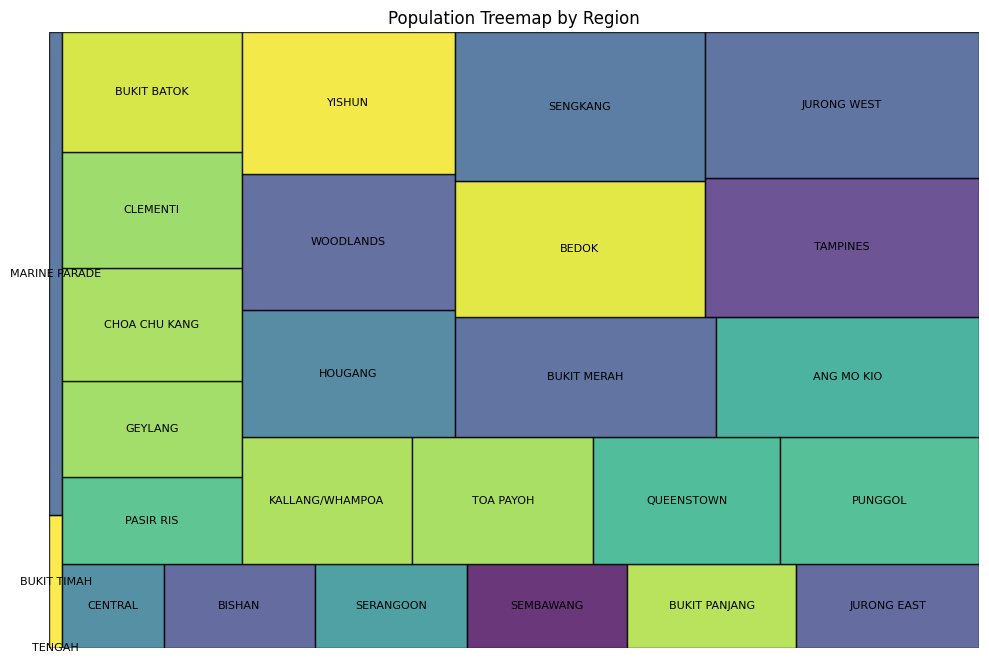

In [116]:
ANG_MO_KIO = 7720  
BEDOK = 8325  
BISHAN = 3098  
BUKIT_BATOK = 5247  
BUKIT_MERAH = 7660  
BUKIT_PANJANG = 3485  
BUKIT_TIMAH = 420  
CENTRAL = 2102  
CHOA_CHU_KANG = 4939  
CLEMENTI = 5110  
GEYLANG = 4219  
HOUGANG = 6620  
JURONG_EAST = 3761  
JURONG_WEST = 9758  
KALLANG_WHAMPOA = 5303  
MARINE_PARADE = 1526  
PASIR_RIS = 3819  
PUNGGOL = 6184  
QUEENSTOWN = 5803  
SEMBAWANG = 3284  
SENGKANG = 9067  
SERANGOON = 3143  
TAMPINES = 9327  
TENGAH = 1  
TOA_PAYOH = 5618  
WOODLANDS = 7060  
YISHUN = 7409  


# Labels and sizes
labels = []
sizes = []

for item in sorted_data_dict:
    # Extract the key (region name) and append it to labels
    labels.append(item[0])
    
    # Extract the value (population size) and append it to sizes
    sizes.append(item[1])



plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, edgecolor="black", text_kwargs={'fontsize': 8})
plt.title("Population Treemap by Region")
plt.axis('off')
plt.show()


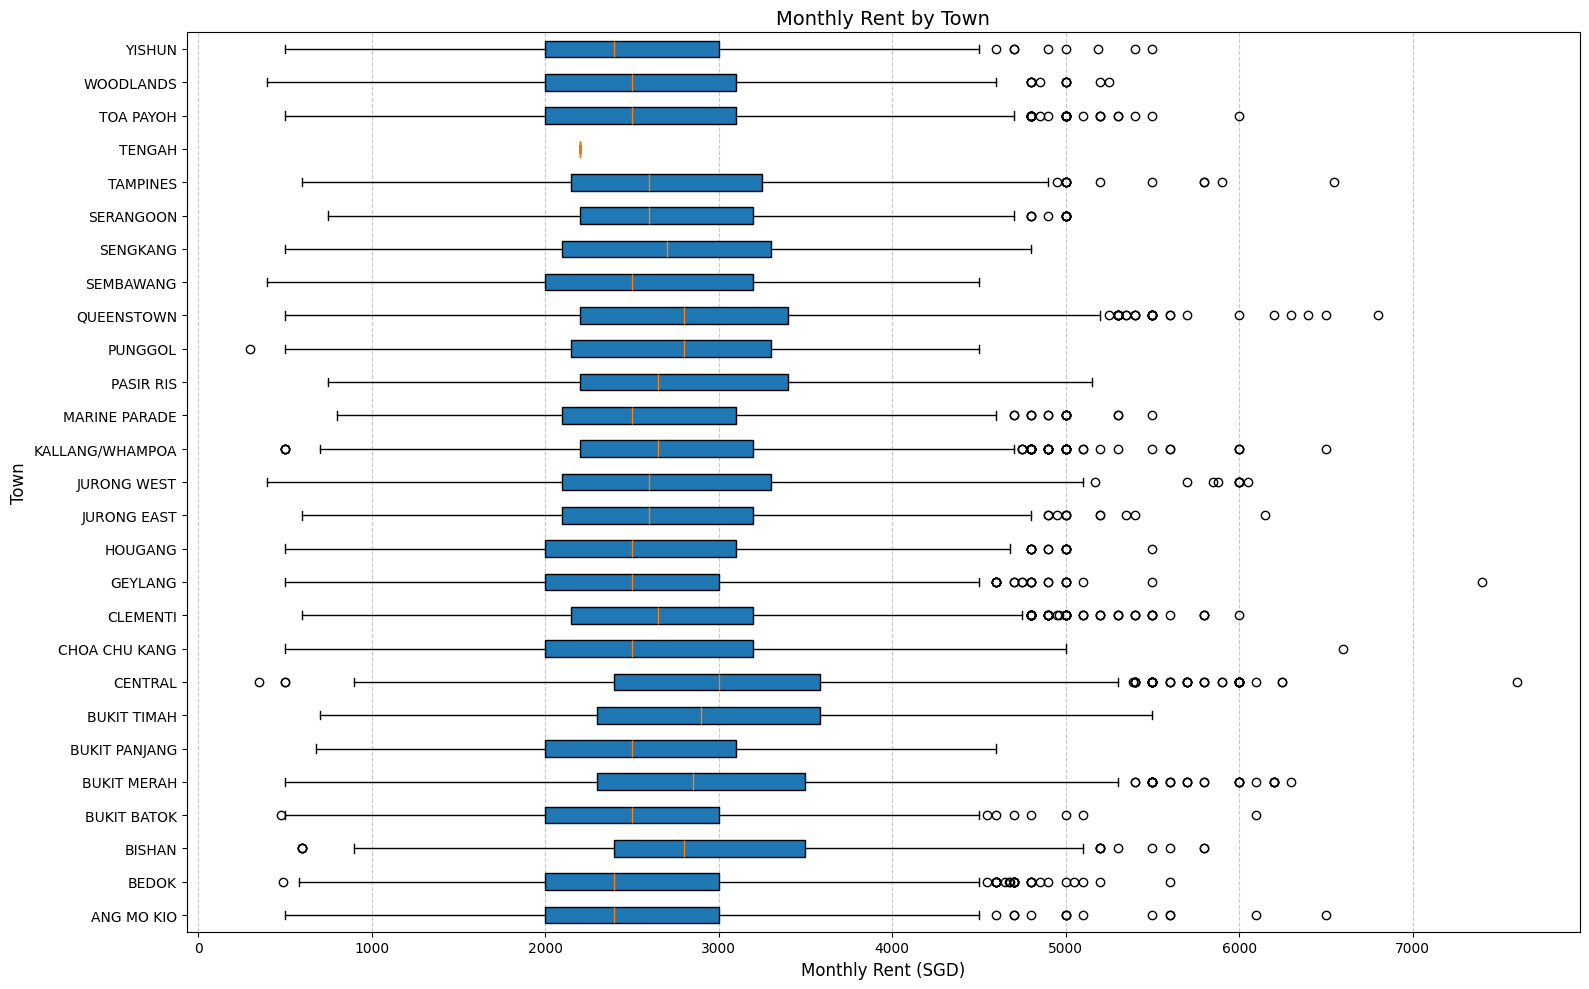

In [118]:
# List of town names from your treemap
towns = [
    "ANG MO KIO", "BEDOK", "BISHAN", "BUKIT BATOK", "BUKIT MERAH", "BUKIT PANJANG",
    "BUKIT TIMAH", "CENTRAL", "CHOA CHU KANG", "CLEMENTI", "GEYLANG", "HOUGANG",
    "JURONG EAST", "JURONG WEST", "KALLANG/WHAMPOA", "MARINE PARADE", "PASIR RIS",
    "PUNGGOL", "QUEENSTOWN", "SEMBAWANG", "SENGKANG", "SERANGOON", "TAMPINES",
    "TENGAH", "TOA PAYOH", "WOODLANDS", "YISHUN"
]

# Filter monthly rent data for each town
boxplot_data = [dataset_2_master[dataset_2_master['town'] == town]['monthly_rent'] for town in towns]

plt.figure(figsize=(16, 10))
plt.boxplot(boxplot_data, vert=False, patch_artist=True)
plt.title('Monthly Rent by Town', fontsize=14)
plt.xlabel('Monthly Rent (SGD)', fontsize=12)
plt.ylabel('Town', fontsize=12)

# Set the town names as y-ticks
plt.yticks(range(1, len(towns) + 1), towns, fontsize=10)

# Improve the grid layout
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
flat_type, counts = np.unique(dataset_2_master['flat_type'], return_counts=True)
print("Unique Values:", flat_type)
print("Counts:", counts)

In [ ]:
for rooms, count in zip(flat_type, counts):
    print(f"{rooms}: {count}")



## dataset 2 (analysis part 2)

In [123]:

refined_dataset = []
for row in dataset_2_master:
    town = row[1]
    flat_type = row[4]
    refined_dataset.append((town, flat_type))
    
refined_dataset = np.array(refined_dataset)

# Display the refined dataset
refined_dataset

array([['ANG MO KIO', '4-ROOM'],
       ['ANG MO KIO', '3-ROOM'],
       ['ANG MO KIO', '3-ROOM'],
       ...,
       ['TAMPINES', '5-ROOM'],
       ['HOUGANG', '3-ROOM'],
       ['ANG MO KIO', '4-ROOM']], dtype='<U15')

In [125]:
location_flat_type = {}
for town, flat_type in refined_dataset:
    if town not in location_flat_type:
        location_flat_type[town] = {}
        
    if flat_type not in location_flat_type[town]:
        location_flat_type[town][flat_type] = 0
    location_flat_type[town][flat_type] += 1 
    


    

In [127]:
location_flat_type

{'ANG MO KIO': {'4-ROOM': 1855,
  '3-ROOM': 4977,
  '5-ROOM': 724,
  '2-ROOM': 126,
  'EXECUTIVE': 38},
 'BEDOK': {'3-ROOM': 4177,
  '4-ROOM': 2521,
  '5-ROOM': 1220,
  '2-ROOM': 120,
  'EXECUTIVE': 287},
 'BISHAN': {'3-ROOM': 641, '4-ROOM': 1559, '5-ROOM': 779, 'EXECUTIVE': 119},
 'BUKIT BATOK': {'4-ROOM': 1926,
  '5-ROOM': 739,
  'EXECUTIVE': 294,
  '3-ROOM': 2077,
  '2-ROOM': 211},
 'BUKIT MERAH': {'3-ROOM': 3220,
  '5-ROOM': 1463,
  '4-ROOM': 2652,
  '2-ROOM': 286,
  '1-ROOM': 38,
  'EXECUTIVE': 1},
 'BUKIT PANJANG': {'4-ROOM': 1455,
  '3-ROOM': 454,
  'EXECUTIVE': 313,
  '5-ROOM': 1207,
  '2-ROOM': 56},
 'BUKIT TIMAH': {'EXECUTIVE': 33,
  '3-ROOM': 127,
  '5-ROOM': 95,
  '4-ROOM': 163,
  '2-ROOM': 2},
 'CENTRAL': {'3-ROOM': 1145,
  '4-ROOM': 675,
  '2-ROOM': 96,
  '5-ROOM': 185,
  'EXECUTIVE': 1},
 'CHOA CHU KANG': {'5-ROOM': 1726,
  '3-ROOM': 311,
  '4-ROOM': 2340,
  'EXECUTIVE': 521,
  '2-ROOM': 38,
  '1-ROOM': 3},
 'CLEMENTI': {'5-ROOM': 453,
  '4-ROOM': 1543,
  '3-ROOM': 3044,

In [129]:
for i, town in enumerate(location_flat_type.keys(), start = 1):
    print(f"Index: {i}, Town: {town}")
    print(f"Flat Types: {location_flat_type[town]}")
    


Index: 1, Town: ANG MO KIO
Flat Types: {'4-ROOM': 1855, '3-ROOM': 4977, '5-ROOM': 724, '2-ROOM': 126, 'EXECUTIVE': 38}
Index: 2, Town: BEDOK
Flat Types: {'3-ROOM': 4177, '4-ROOM': 2521, '5-ROOM': 1220, '2-ROOM': 120, 'EXECUTIVE': 287}
Index: 3, Town: BISHAN
Flat Types: {'3-ROOM': 641, '4-ROOM': 1559, '5-ROOM': 779, 'EXECUTIVE': 119}
Index: 4, Town: BUKIT BATOK
Flat Types: {'4-ROOM': 1926, '5-ROOM': 739, 'EXECUTIVE': 294, '3-ROOM': 2077, '2-ROOM': 211}
Index: 5, Town: BUKIT MERAH
Flat Types: {'3-ROOM': 3220, '5-ROOM': 1463, '4-ROOM': 2652, '2-ROOM': 286, '1-ROOM': 38, 'EXECUTIVE': 1}
Index: 6, Town: BUKIT PANJANG
Flat Types: {'4-ROOM': 1455, '3-ROOM': 454, 'EXECUTIVE': 313, '5-ROOM': 1207, '2-ROOM': 56}
Index: 7, Town: BUKIT TIMAH
Flat Types: {'EXECUTIVE': 33, '3-ROOM': 127, '5-ROOM': 95, '4-ROOM': 163, '2-ROOM': 2}
Index: 8, Town: CENTRAL
Flat Types: {'3-ROOM': 1145, '4-ROOM': 675, '2-ROOM': 96, '5-ROOM': 185, 'EXECUTIVE': 1}
Index: 9, Town: CHOA CHU KANG
Flat Types: {'5-ROOM': 1726, '

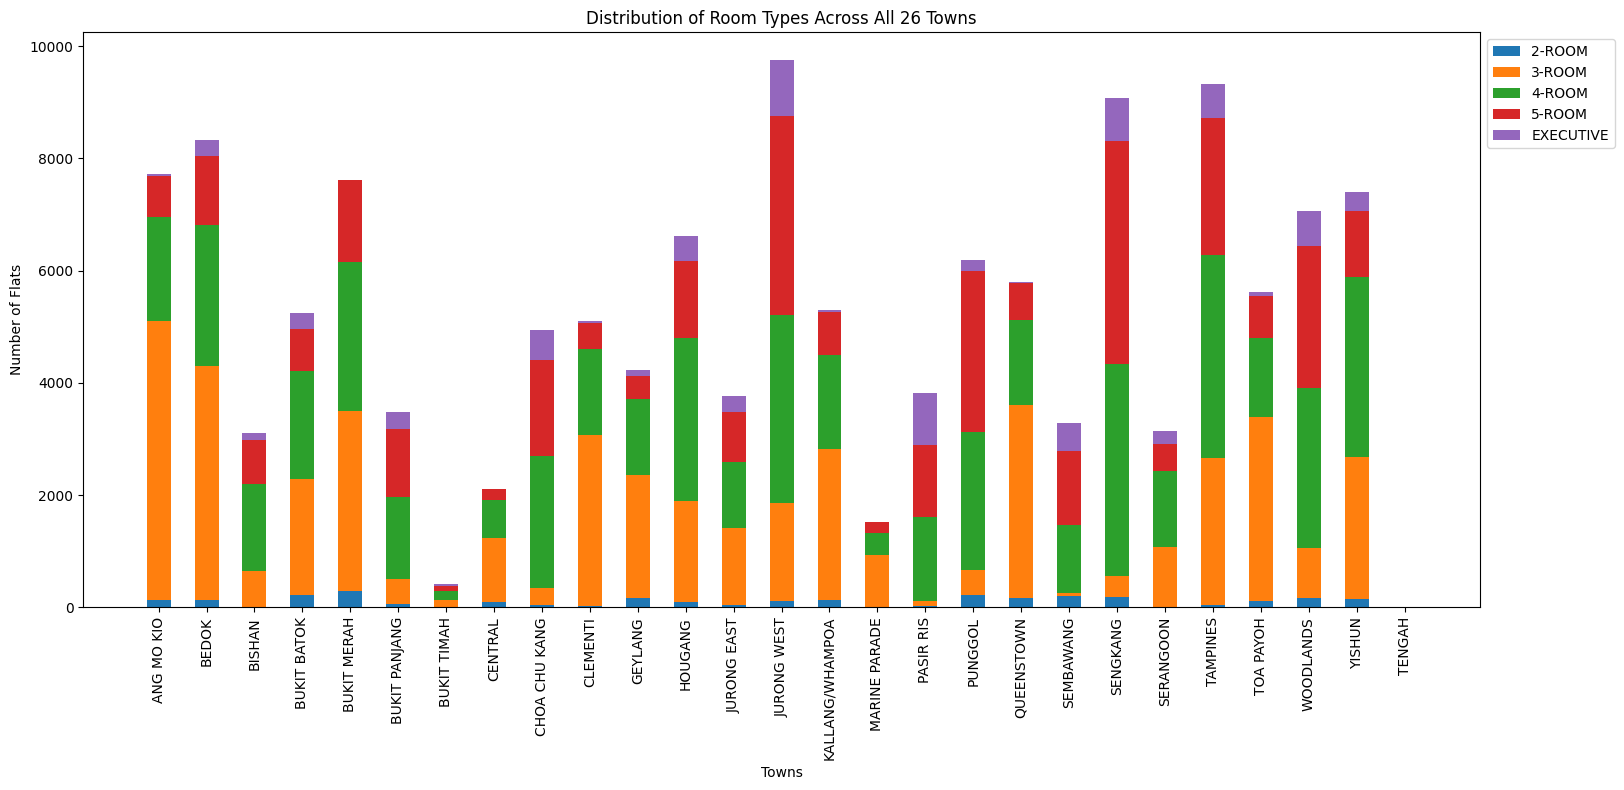

In [133]:
# Step 1: Extract all town names and their corresponding room type counts
towns = list(location_flat_type.keys())  # All 26 towns
room_types = ["2-ROOM", "3-ROOM", "4-ROOM", "5-ROOM", "EXECUTIVE"]

# Initialize room type data
room_type_data = {room_type: [] for room_type in room_types}

# Populate room type counts for each town
for town in towns:
    for room_type in room_types:
        # Get the count for each room type, defaulting to 0 if not present
        room_type_data[room_type].append(location_flat_type[town].get(room_type, 0))

# Convert lists to numpy arrays for efficient stacking
for room_type in room_types:
    room_type_data[room_type] = np.array(room_type_data[room_type])

# Step 2: Plot the stacked bar chart
width = 0.5
fig, ax = plt.subplots(figsize=(15, 8))  # Adjust figure size for better readability
bottom = np.zeros(len(towns))  # Initialize the bottom baseline

# Create stacked bars for each room type
for room_type, counts in room_type_data.items():
    ax.bar(towns, counts, width, label=room_type, bottom=bottom)
    bottom += counts  # Update the bottom for stacking

# Step 3: Customize the chart
ax.set_title("Distribution of Room Types Across All 26 Towns")
ax.set_xlabel("Towns")
ax.set_ylabel("Number of Flats")
ax.legend(loc="upper right")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.legend(bbox_to_anchor=(1, 1.0), loc='upper left')
# Show the chart
plt.show()

## checking the total distribution of houses based on different towns in the dataset_3

In [ ]:
print(dataset_3_master[:5])
dataset_3_copy = dataset_3_master
# month	town	flat_type	block	street_name	storey_range	floor_area_sqm	flat_model	lease_commence_date	remaining_lease	resale_price


In [ ]:
#Count Total Rows in the Dataset:
total_rows_data_3 = len(dataset_3_master)
print(f"The total number of rows found in the dataset 3 is {total_rows_data_3}")

In [ ]:
towns = dataset_3_master["town"]
unique_towns = np.unique(towns)
num_unique_towns = len(unique_towns)

# Flat Type
flat_types = dataset_3_master["flat_type"]
unique_flat_types = np.unique(flat_types)
num_unique_flat_types = len(unique_flat_types)

# Process continuous variables
# Floor Area (sqm)
floor_area = dataset_3_master["floor_area_sqm"]
min_floor_area = np.min(floor_area)
max_floor_area = np.max(floor_area)

# Remaining Lease (converted to months)
# Parse the "remaining_lease" field (e.g., "92 years 11 months") into months
remaining_lease = []
for lease in dataset_3_master["remaining_lease"]:
    years, months = 0, 0
    if "year" in lease:
        years = int(lease.split("year")[0].strip())
    if "month" in lease:
        months = int(lease.split("month")[0].split()[-1].strip())
    remaining_lease.append(years * 12 + months)
remaining_lease = np.array(remaining_lease)

min_lease = np.min(remaining_lease)
max_lease = np.max(remaining_lease)

# Resale Price
resale_prices = dataset_3_master["resale_price"]
min_resale_price = np.min(resale_prices)
max_resale_price = np.max(resale_prices)
mean_resale_price = np.mean(resale_prices)

# Summary Output
print("\nSummary of the Data")
print("-------------------")
print(f"Number of unique towns: {num_unique_towns}")
print(f"Unique towns: {unique_towns}")
print(f"Number of unique flat types: {num_unique_flat_types}")
print(f"Unique flat types: {unique_flat_types}")
print(f"Floor Area (sqm): Min = {min_floor_area}, Max = {max_floor_area}")
print(f"Remaining Lease (months): Min = {min_lease}, Max = {max_lease}")
print(f"Resale Price: Min = {min_resale_price}, Max = {max_resale_price}, Mean = {mean_resale_price}")

In [ ]:
towns, counts = np.unique(dataset_3_master['town'], return_counts=True)
print("Unique Values:", towns)
print("Counts:", counts)

In [ ]:
print("\nSummary of the town counts")
for town, count in zip(towns, counts):
    print(f"{town}: {count}")

In [ ]:
np.unique(dataset_3_master['storey_range'])

In [ ]:


# Extract the 'storey_range' column
storey_range = dataset_3_master['storey_range']

# Use np.unique to calculate unique storey ranges and their counts
storey_ranges, counts = np.unique(storey_range, return_counts=True)

# Print the results
print("Storey Range Counts:")
for storey_range, count in zip(storey_ranges, counts):
    print(f"{storey_range}: {count}")

In [ ]:
# this served as justification as to why I chose not to include storey range as part of the regression model
# Plot the histogram for storey range counts
plt.figure(figsize=(12, 6))
plt.bar(storey_ranges, counts, color='lightblue', edgecolor='black')

# Add labels and title
plt.xlabel('Storey Range', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Histogram of Storey Range Counts', fontsize=16)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
np.unique(dataset_3_master['resale_price'])

In [ ]:
np.unique(dataset_3_master['flat_type'])

In [18]:
np.unique(dataset_3_master['remaining_lease'])

array(['41 years 03 months', '41 years 04 months', '41 years 05 months',
       '41 years 06 months', '41 years 07 months', '41 years 08 months',
       '41 years 09 months', '41 years 10 months', '41 years 11 months',
       '42 years', '42 years 01 month', '42 years 02 months',
       '42 years 03 months', '42 years 04 months', '42 years 05 months',
       '42 years 06 months', '42 years 07 months', '42 years 08 months',
       '42 years 09 months', '42 years 10 months', '42 years 11 months',
       '43 years', '43 years 01 month', '43 years 02 months',
       '43 years 03 months', '43 years 04 months', '43 years 05 months',
       '43 years 06 months', '43 years 07 months', '43 years 08 months',
       '43 years 09 months', '43 years 10 months', '43 years 11 months',
       '44 years', '44 years 01 month', '44 years 02 months',
       '44 years 03 months', '44 years 04 months', '44 years 05 months',
       '44 years 06 months', '44 years 07 months', '44 years 08 months',
       '44 

In [60]:
np.unique(dataset_3_master['flat_model']) #since i am not interested in the layout of the hdb - this is my secondary criteria  i will exclude this

array(['2-room', '3Gen', 'Adjoined flat', 'Apartment', 'DBSS', 'Improved',
       'Improved-Maisonette', 'Maisonette', 'Model A',
       'Model A-Maisonette', 'Model A2', 'Multi Generation',
       'New Generation', 'Premium Apartment', 'Premium Apartment Loft',
       'Premium Maisonette', 'Simplified', 'Standard', 'Terrace',
       'Type S1', 'Type S2'], dtype='<U50')

In [62]:
np.unique(dataset_3_master['floor_area_sqm'])

array([ 31. ,  34. ,  35. ,  37. ,  38. ,  39. ,  40. ,  41. ,  42. ,
        43. ,  44. ,  45. ,  46. ,  47. ,  48. ,  49. ,  50. ,  51. ,
        52. ,  53. ,  54. ,  55. ,  56. ,  57. ,  58. ,  59. ,  60. ,
        60.3,  61. ,  62. ,  63. ,  63.1,  64. ,  65. ,  66. ,  67. ,
        68. ,  69. ,  70. ,  71. ,  72. ,  73. ,  74. ,  75. ,  76. ,
        77. ,  78. ,  79. ,  80. ,  81. ,  82. ,  83. ,  83.1,  84. ,
        85. ,  86. ,  87. ,  88. ,  88.4,  89. ,  89.7,  90. ,  90.8,
        91. ,  92. ,  93. ,  94. ,  95. ,  96. ,  97. ,  98. ,  99. ,
       100. , 100.2, 101. , 102. , 103. , 104. , 105. , 106. , 107. ,
       108. , 109. , 110. , 111. , 112. , 113. , 114. , 115. , 116. ,
       117. , 118. , 119. , 120. , 121. , 122. , 123. , 124. , 125. ,
       126. , 127. , 128. , 129. , 130. , 131. , 132. , 133. , 134. ,
       135. , 136. , 137. , 138. , 139. , 140. , 141. , 142. , 143. ,
       144. , 145. , 146. , 147. , 148. , 149. , 150. , 151. , 152. ,
       153. , 154. ,

## regression

## so the model will include following:

## categorical variables
#### town - 26 of them categorized into 5 regions (prevent overfitting) - 5 dummy variables ((Northeast, East, Central, North, West)
#### flattype - 6 dummy variables (['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION] - 

## continuous  variables
#### floor_area sqm - min 31 and max 366.7
#### remaining lease - converted to months min_lease, max_lease - (495, 1173)
#### resale price 
___________________________________________________________________________________________________________________

##### convert data into different regions - given that 27 towns in total could cause overfitting
##### data transformation

In [69]:
# Group towns into regions
#pls refer to the following websites - to see how each area is being categorised based on regions. 

# - https://smartwealth.sg/average-house-price-singapore/
# - https://www.edgeprop.sg/property-news/analysis-which-hdb-towns-have-highest-and-lowest-price-growth
#total of 5 regions - categorising them
region_map = {
    'ANG MO KIO': 'Northeast',
    'BEDOK': 'East',
    'BISHAN': 'Central',
    'BUKIT BATOK': 'West',
    'BUKIT MERAH': 'Central',
    'BUKIT PANJANG': 'West',
    'BUKIT TIMAH': 'Central',
    'CENTRAL AREA': 'Central',
    'CHOA CHU KANG': 'West',
    'CLEMENTI': 'West',
    'GEYLANG': 'Central',
    'HOUGANG': 'Northeast',
    'JURONG EAST': 'West',
    'JURONG WEST': 'West',
    'KALLANG/WHAMPOA': 'Central',
    'MARINE PARADE': 'Central',
    'PASIR RIS': 'East',
    'PUNGGOL': 'Northeast',
    'QUEENSTOWN': 'Central',
    'SEMBAWANG': 'North',
    'SENGKANG': 'Northeast',
    'SERANGOON': 'Northeast',
    'TAMPINES': 'East',
    'TOA PAYOH': 'Central',
    'WOODLANDS': 'North',
    'YISHUN': 'North'
}


In [71]:
# Create a new structured array with additional fields for 'region' and dummy variables

regions = ['North', 'West', 'East', 'Central', 'Northeast']

new_dtype = dataset_3_master.dtype.descr + [('region', 'U20')] + [(f'region_{region}', 'int32') for region in regions]
updated_dataset_with_dummies = np.zeros(dataset_3_master.shape, dtype=new_dtype)

# Copy existing data
for field in dataset_3_master.dtype.names:
    updated_dataset_with_dummies[field] = dataset_3_master[field]

# Populate the region field
updated_dataset_with_dummies['region'] = [region_map.get(town, 'Unknown') for town in dataset_3_master['town']]

# Populate dummy variables
for region in regions:
    updated_dataset_with_dummies[f'region_{region}'] = (updated_dataset_with_dummies['region'] == region).astype(int)

# Verify the result
updated_dataset_with_dummies[:5]

array([('2017-01', 'ANG MO KIO', '2 ROOM', '406', 'ANG MO KIO AVE 10', '10 TO 12', 44., 'Improved', 1979, '61 years 04 months', 232000., 'Northeast', 0, 0, 0, 0, 1),
       ('2017-01', 'ANG MO KIO', '3 ROOM', '108', 'ANG MO KIO AVE 4', '01 TO 03', 67., 'New Generation', 1978, '60 years 07 months', 250000., 'Northeast', 0, 0, 0, 0, 1),
       ('2017-01', 'ANG MO KIO', '3 ROOM', '602', 'ANG MO KIO AVE 5', '01 TO 03', 67., 'New Generation', 1980, '62 years 05 months', 262000., 'Northeast', 0, 0, 0, 0, 1),
       ('2017-01', 'ANG MO KIO', '3 ROOM', '465', 'ANG MO KIO AVE 10', '04 TO 06', 68., 'New Generation', 1980, '62 years 01 month', 265000., 'Northeast', 0, 0, 0, 0, 1),
       ('2017-01', 'ANG MO KIO', '3 ROOM', '601', 'ANG MO KIO AVE 5', '01 TO 03', 67., 'New Generation', 1980, '62 years 05 months', 265000., 'Northeast', 0, 0, 0, 0, 1)],
      dtype=[('month', '<U10'), ('town', '<U50'), ('flat_type', '<U20'), ('block', '<U10'), ('street_name', '<U100'), ('storey_range', '<U20'), ('flo

In [73]:
# Convert NumPy structured array to a pandas DataFrame
## updated_dataset_df = pd.DataFrame.from_records(updated_dataset_with_dummies)

# Define file path for saving
## file_path = 'updated_dataset_with_regiondummies.csv'

# Save to the current working directory
## updated_dataset_df.to_csv(file_path, index=False)

## print(f"Dataset saved successfully as {file_path}")

In [171]:
# Inspect region mapping for sample rows
for i in range(10):  # Adjust range for more rows
    print(f"Town: {updated_dataset_with_dummies['town'][i]}, Region: {updated_dataset_with_dummies['region'][i]}")


Town: ANG MO KIO, Region: Northeast
Town: ANG MO KIO, Region: Northeast
Town: ANG MO KIO, Region: Northeast
Town: ANG MO KIO, Region: Northeast
Town: ANG MO KIO, Region: Northeast
Town: ANG MO KIO, Region: Northeast
Town: ANG MO KIO, Region: Northeast
Town: ANG MO KIO, Region: Northeast
Town: ANG MO KIO, Region: Northeast
Town: ANG MO KIO, Region: Northeast


In [173]:
# Count rows for each dummy variable
region_counts = {
    "North": np.sum(updated_dataset_with_dummies['region_North']),
    "West": np.sum(updated_dataset_with_dummies['region_West']),
    "East": np.sum(updated_dataset_with_dummies['region_East']),
    "Central": np.sum(updated_dataset_with_dummies['region_Central']),
    "Northeast": np.sum(updated_dataset_with_dummies['region_Northeast']),
}

print("Region Counts:", region_counts)

# region is dummy coded.

Region Counts: {'North': 32244, 'West': 44635, 'East': 28793, 'Central': 36035, 'Northeast': 51505}


In [175]:
#https://stackoverflow.com/questions/71596321/how-to-convert-a-column-of-x-years-and-y-months-into-12xy-months

# Define the function to convert lease strings to total months
def lease_string_to_months(lease_str):
    try:
        split_string = lease_str.split(' ')
        years = int(split_string[0])  # Extract years
        months = int(split_string[2]) if len(split_string) > 2 else 0  # Extract months if present
        return 12 * years + months
    except Exception:
        return 0  # Return 0 for invalid or unexpected formats

# Convert `remaining_lease` to months
remaining_lease_months = np.array([lease_string_to_months(lease) for lease in updated_dataset_with_dummies['remaining_lease']])

# Define a new dtype with the additional field
new_dtype = updated_dataset_with_dummies.dtype.descr + [('remaining_lease_months', 'int32')]

# Create a new structured array with the new dtype
new_data = np.zeros(updated_dataset_with_dummies.shape, dtype=new_dtype)

# Copy the existing data
for name in updated_dataset_with_dummies.dtype.names:
    new_data[name] = updated_dataset_with_dummies[name]

# Add the new field
new_data['remaining_lease_months'] = remaining_lease_months

# Verify the result
print(new_data[['remaining_lease', 'remaining_lease_months']][:5])

[('61 years 04 months', 736) ('60 years 07 months', 727)
 ('62 years 05 months', 749) ('62 years 01 month', 745)
 ('62 years 05 months', 749)]


In [177]:
min_lease = new_data['remaining_lease_months'].min()
max_lease = new_data['remaining_lease_months'].max()

min_lease, max_lease

(495, 1173)

In [180]:
# Convert the NumPy structured array to a pandas DataFrame
##results_df = pd.DataFrame.from_records(updated_dataset_with_dummies_and_lease)

# Save the DataFrame to a CSV file
##output_file_path = 'updated_dataset_with_region&lease_months.csv'
##results_df.to_csv(output_file_path, index=False)

##print(f"Results saved successfully to {output_file_path}")

In [183]:
# Define flat_type to dummy variable mapping
flat_type_mapping = {
    '1 ROOM': 'flat_type_ROOM_1',
    '2 ROOM': 'flat_type_ROOM_2',
    '3 ROOM': 'flat_type_ROOM_3',
    '4 ROOM': 'flat_type_ROOM_4',
    '5 ROOM': 'flat_type_ROOM_5',
    'EXECUTIVE': 'flat_type_EXECUTIVE',
    'MULTI-GENERATION': 'flat_type_MULTI-GENERATION'
}

# Add dummy variable fields to dtype
dummy_fields = [(dummy_name, 'int32') for dummy_name in flat_type_mapping.values()]
new_dtype_with_dummies = new_data.dtype.descr + dummy_fields

# Create a new structured array with updated dtype
new_data_with_dummies = np.zeros(new_data.shape, dtype=new_dtype_with_dummies)

# Copy the existing data
for name in new_data.dtype.names:
    new_data_with_dummies[name] = new_data[name]

# Populate dummy variables
for flat_type, dummy_name in flat_type_mapping.items():
    new_data_with_dummies[dummy_name] = (new_data['flat_type'] == flat_type).astype(int)

In [185]:
# Check dummy variables for `region` (assuming you added region-related dummies)
region_columns = [col for col in new_data_with_dummies.dtype.names if col.startswith('region_')]
print(f"Region Dummy Variables: {region_columns}")

# Check dummy variables for `flat_type`
flat_type_columns = [col for col in new_data_with_dummies.dtype.names if col.startswith('flat_type_')]
print(f"Flat Type Dummy Variables: {flat_type_columns}")

# Display a few rows of these dummy columns to verify the data
print(new_data_with_dummies[region_columns][:5])  # First 5 rows of region dummies
print(new_data_with_dummies[flat_type_columns][:5])  # First 5 rows of flat type dummies


Region Dummy Variables: ['region_North', 'region_West', 'region_East', 'region_Central', 'region_Northeast']
Flat Type Dummy Variables: ['flat_type_ROOM_1', 'flat_type_ROOM_2', 'flat_type_ROOM_3', 'flat_type_ROOM_4', 'flat_type_ROOM_5', 'flat_type_EXECUTIVE', 'flat_type_MULTI-GENERATION']
[(0, 0, 0, 0, 1) (0, 0, 0, 0, 1) (0, 0, 0, 0, 1) (0, 0, 0, 0, 1)
 (0, 0, 0, 0, 1)]
[(0, 1, 0, 0, 0, 0, 0) (0, 0, 1, 0, 0, 0, 0) (0, 0, 1, 0, 0, 0, 0)
 (0, 0, 1, 0, 0, 0, 0) (0, 0, 1, 0, 0, 0, 0)]


In [187]:
#check all variables
#each category

In [28]:
# Convert the NumPy structured array to a pandas DataFrame
##results_df = pd.DataFrame.from_records(new_data_with_dummies)

# Save the DataFrame to a CSV file
##output_file_path = 'updated_dataset_with_alldummies.csv'
##results_df.to_csv(output_file_path, index=False)

##print(f"Results saved successfully to {output_file_path}")

In [189]:
# Define the dependent variable (resale price)
Y = new_data_with_dummies['resale_price']

# Define the independent variables by extracting numerical data
independent_columns = [
    'floor_area_sqm', 'remaining_lease_months', 
    'region_West', 'region_East',  
    'region_Central', 'region_Northeast',
    'flat_type_ROOM_2', 'flat_type_ROOM_3', 'flat_type_ROOM_4', 
    'flat_type_ROOM_5', 'flat_type_EXECUTIVE', 'flat_type_MULTI-GENERATION' #north and flat_type_room_1 not included in the model
]

# Extract the independent variables into a plain NumPy array
X = np.column_stack([new_data_with_dummies[col] for col in independent_columns])

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the multiple linear regression model with proper variable names
linear_model = sm.OLS(Y, X)
result = linear_model.fit()

# Display the model summary
print(result.summary(xname=['const'] + independent_columns))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                 2.420e+04
Date:                Mon, 30 Dec 2024   Prob (F-statistic):               0.00
Time:                        13:02:46   Log-Likelihood:            -2.5198e+06
No. Observations:              193212   AIC:                         5.040e+06
Df Residuals:                  193199   BIC:                         5.040e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

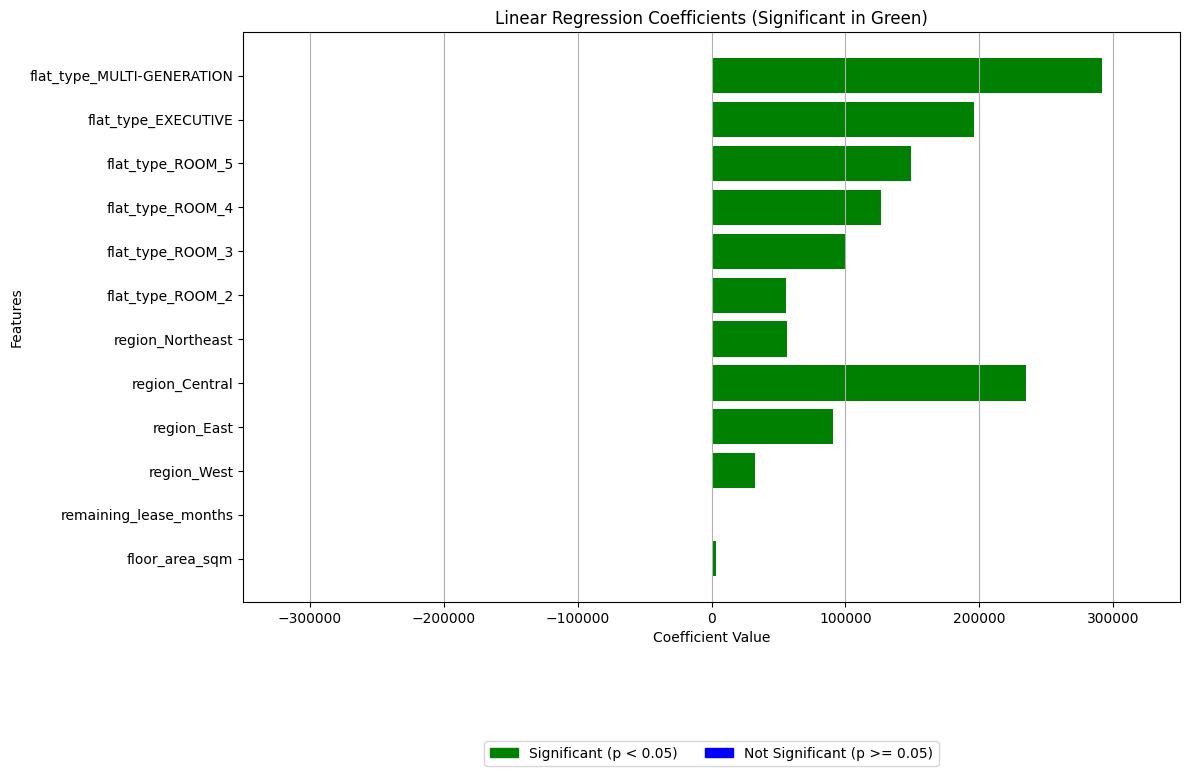

In [191]:
# Assuming coefficients, p_values, and features are already extracted
coefficients = result.params[1:]  # Exclude the intercept
p_values = result.pvalues[1:]  # Exclude the intercept p-value
features = ['floor_area_sqm', 'remaining_lease_months', 
            'region_West', 'region_East', 
            'region_Central', 'region_Northeast',
            'flat_type_ROOM_2', 'flat_type_ROOM_3', 'flat_type_ROOM_4', 
            'flat_type_ROOM_5', 'flat_type_EXECUTIVE', 'flat_type_MULTI-GENERATION'] #north and flat_type_room_1 not included in the model

# Define significance threshold (p < 0.05)
significance_threshold = 0.05

# Create a color map based on significance
colors = np.where(p_values < significance_threshold, 'green', 'blue')

# Define fixed x-axis limits for symmetry
x_limit = 350000

# Plot the coefficients, highlighting significant variables
plt.figure(figsize=(12, 8))
plt.barh(features, coefficients, color=colors)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Linear Regression Coefficients (Significant in Green)')
plt.grid(True, axis='x')

# Set fixed x-axis limits
plt.xlim(-x_limit, x_limit)

# Add a legend with two categories
handles = [plt.Rectangle((0, 0), 1, 1, color="green"), 
           plt.Rectangle((0, 0), 1, 1, color="blue")]
labels = ["Significant (p < 0.05)", "Not Significant (p >= 0.05)"]
plt.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)

# Display the plot
plt.tight_layout()
plt.show()

In [193]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict the resale prices using the model
predicted_prices = result.predict(X)

# Calculate evaluation metrics
mae = mean_absolute_error(Y, predicted_prices)
mse = mean_squared_error(Y, predicted_prices)
r2 = r2_score(Y, predicted_prices)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Absolute Error (MAE): 88124.62
Mean Squared Error (MSE): 12448814637.39
R-squared (R2): 0.60


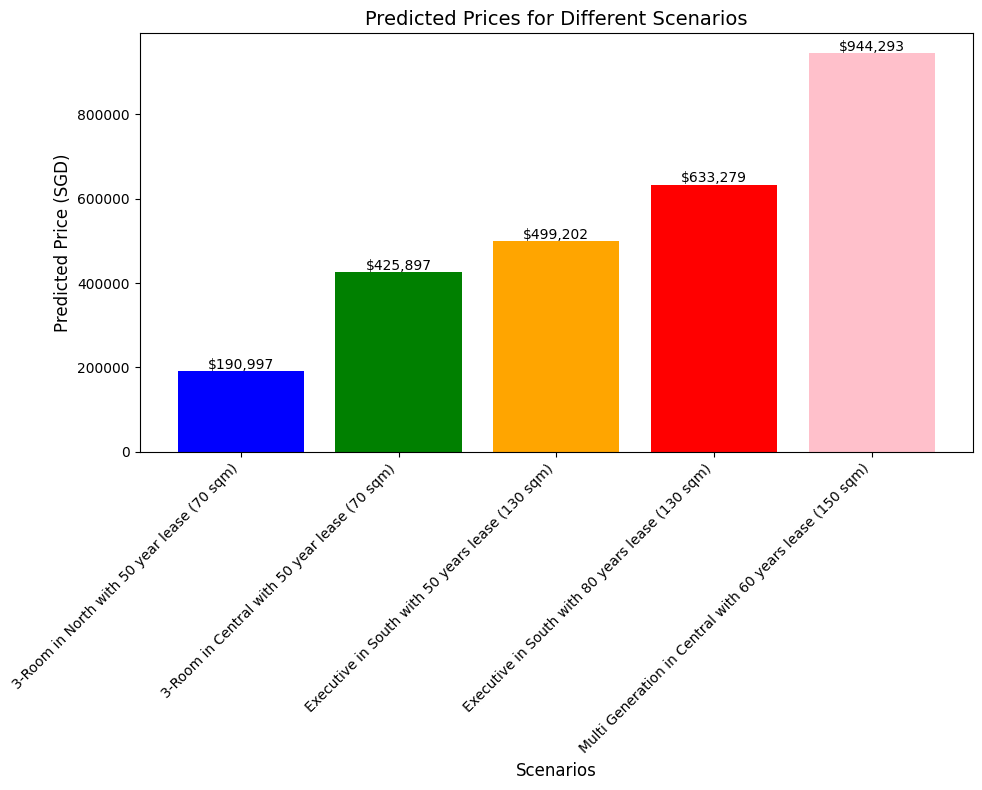

In [27]:
# Updated coefficients based on the shared regression results
coefficients_updated = {
    "intercept": -378900,
    "floor_area_sqm": 3524.927,
    "remaining_lease_months": 372.4361,
    "region_North": 0,  # North is baseline
    "region_Central": 234900,
    "flat_type_ROOM_3": 99690,
    "flat_type_EXECUTIVE": 196400,
    "flat_type_MULTI-GENERATION": 291400
}

# Define updated scenarios for comparison
scenarios_updated = {
    "3-Room in North with 50 year lease (70 sqm)": {
        "floor_area_sqm": 70,  # Average size for a 3-Room flat
        "remaining_lease_months": 600,  # Example lease of 50 years
        "region": "North",
        "flat_type": "ROOM_3",
    },
    "3-Room in Central with 50 year lease (70 sqm)": {
        "floor_area_sqm": 70,
        "remaining_lease_months": 600,
        "region": "Central",
        "flat_type": "ROOM_3",
    },
    "Executive in South with 50 years lease (130 sqm)": {
        "floor_area_sqm": 130,  # Average size for an Executive flat
        "remaining_lease_months": 600,
        "region": "South",  
        "flat_type": "EXECUTIVE",
    },
    "Executive in South with 80 years lease (130 sqm)": {
        "floor_area_sqm": 130,
        "remaining_lease_months": 960,  # 80 years in months
        "region": "South",
        "flat_type": "EXECUTIVE",
    },
        "Multi Generation in Central with 60 years lease (150 sqm)": {
        "floor_area_sqm": 150,  # Average size for an Executive flat
        "remaining_lease_months": 720,
        "region": "Central",  
        "flat_type": "MULTI-GENERATION",
    },
}

# Calculate predicted prices for each scenario with updated coefficients
predicted_prices_updated = {}
for scenario, features in scenarios_updated.items():
    price = coefficients_updated["intercept"]
    price += coefficients_updated["floor_area_sqm"] * features["floor_area_sqm"]
    price += coefficients_updated["remaining_lease_months"] * features["remaining_lease_months"]

    # Add region coefficient (South is baseline, so no addition for South)
    if features["region"] != "North":  # North is baseline, no coefficient added
        price += coefficients_updated.get(f'region_{features["region"]}', 0)

    # Add flat type coefficient
    price += coefficients_updated[f'flat_type_{features["flat_type"]}']

    predicted_prices_updated[scenario] = price

# Plot the results
plt.figure(figsize=(10, 8))
plt.bar(predicted_prices_updated.keys(), predicted_prices_updated.values(), color=["blue", "green", "orange", "red", "pink"])
plt.title("Predicted Prices for Different Scenarios", fontsize=14)
plt.ylabel("Predicted Price (SGD)", fontsize=12)
plt.xlabel("Scenarios", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)

# Annotate the bars with the predicted prices
for i, (scenario, price) in enumerate(predicted_prices_updated.items()):
    plt.text(i, price + 5000, f"${price:,.0f}", ha="center", fontsize=10, color="black")

plt.tight_layout()
plt.show()
